<a href="https://colab.research.google.com/github/vijayasri14/Portfolio/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
from keras.datasets import cifar10
cifar10

<module 'keras.datasets.cifar10' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/cifar10/__init__.py'>

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [ ]:
 #check type of the train and test
 type(xtrain)

numpy.ndarray

In [ ]:
#check the shape of the train and test
xtrain.shape

(50000, 32, 32, 3)

array([[[154, 179, 152],
        [159, 183, 157],
        [165, 189, 162],
        ...,
        [129, 161, 137],
        [125, 158, 133],
        [122, 155, 131]],

       [[156, 177, 152],
        [160, 180, 155],
        [163, 184, 159],
        ...,
        [118, 150, 126],
        [120, 152, 128],
        [118, 150, 126]],

       [[146, 169, 143],
        [130, 152, 126],
        [128, 151, 125],
        ...,
        [118, 150, 126],
        [112, 144, 120],
        [107, 139, 115]],

       ...,

       [[125, 146, 129],
        [126, 147, 127],
        [124, 146, 124],
        ...,
        [123, 141, 117],
        [126, 140, 118],
        [131, 144, 122]],

       [[125, 145, 127],
        [127, 148, 128],
        [125, 146, 124],
        ...,
        [120, 137, 119],
        [128, 142, 125],
        [129, 141, 125]],

       [[119, 136, 120],
        [121, 138, 119],
        [135, 153, 132],
        ...,
        [132, 148, 135],
        [136, 149, 137],
        [146, 157, 146]]], dtype=uint8)
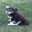

In [ ]:
#look a first image in array
xtrain[70]#0 to 225

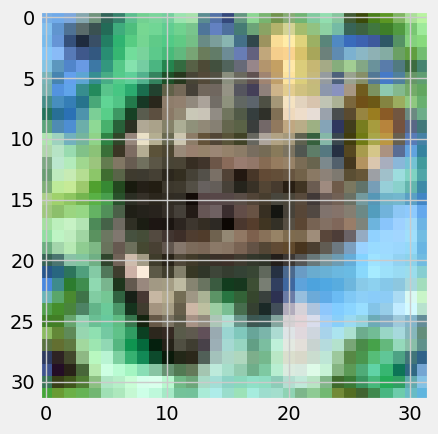

In [ ]:
 img0=plt.imshow(xtrain[200])

In [ ]:
lab1=ytrain[200]
print(lab1)


[6]


In [ ]:
 classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 print('image class is:', classification[ytrain[200][0]])

image class is: frog


In [ ]:
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [ ]:
ytest_one_hot[40]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
 #normalize the pixels values
xtrain=xtrain/225
xtest=xtest/255

In [ ]:
 xtrain[10]

array([[[0.23555556, 0.28888889, 0.23555556],
        [0.24      , 0.28      , 0.23111111],
        [0.24888889, 0.26666667, 0.22222222],
        ...,
        [0.20888889, 0.22666667, 0.22222222],
        [0.18222222, 0.2       , 0.19555556],
        [0.10666667, 0.12444444, 0.12      ]],

       [[0.20444444, 0.26222222, 0.18222222],
        [0.23555556, 0.27555556, 0.2       ],
        [0.24      , 0.26222222, 0.19555556],
        ...,
        [0.18666667, 0.20444444, 0.2       ],
        [0.17333333, 0.19111111, 0.18666667],
        [0.12444444, 0.14222222, 0.13777778]],

       [[0.2       , 0.26222222, 0.16888889],
        [0.22222222, 0.26666667, 0.18222222],
        [0.20444444, 0.23111111, 0.15111111],
        ...,
        [0.16888889, 0.18666667, 0.18222222],
        [0.16      , 0.17777778, 0.17333333],
        [0.12888889, 0.14666667, 0.14222222]],

       ...,

       [[0.31555556, 0.36888889, 0.29333333],
        [0.32888889, 0.36888889, 0.29333333],
        [0.35555556, 0

In [ ]:
 #create the architecture
 model=Sequential()
 #first conv layer
 model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
 #pooling layer
 model.add(MaxPool2D(pool_size=(2,2)))
 #second conv
 model.add(Conv2D(32,(5,5),activation='relu'))
 #Pooling layer two
 model.add(MaxPool2D(pool_size=(2,2)))
 #flattening layer
 model.add(Flatten())
 #add a layer
 model.add(Dense(1000,activation='relu'))
 #add Dropout layer
 model.add(Dropout(0.5))
 #add a layer
 model.add(Dense(500,activation='relu'))
 #add dropout layer
 model.add(Dropout(0.5))
 #add a layer
 model.add(Dense(500,activation='relu'))
 #add Dropout layer
 model.add(Dropout(0.5))
 #add a layer
 model.add(Dense(250,activation='relu'))
 #add a layer
 model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       801,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,824 (6.51 MB)

 Trainable params: 1,707,824 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=15,validation_split=0.2)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.1812 - loss: 2.1302 - val_accuracy: 0.4103 - val_loss: 1.5779
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 493ms/step - accuracy: 0.4062 - loss: 1.5766 - val_accuracy: 0.4848 - val_loss: 1.4096
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 487ms/step - accuracy: 0.4827 - loss: 1.4095 - val_accuracy: 0.5384 - val_loss: 1.2686
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 451ms/step - accuracy: 0.5392 - loss: 1.2738 - val_accuracy: 0.5830 - val_loss: 1.1566
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 422ms/step - accuracy: 0.5787 - loss: 1.1854 - val_accuracy: 0.5775 - val_loss: 1.1710
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.5946 - loss: 1.1314 - val_accuracy: 0.6193 - val_loss: 1.0855
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 412ms/step - accuracy: 0.6288 - loss: 1.0439 - val_accuracy: 0.6222 - val_loss: 1.0557
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 422ms/step - accuracy: 0.6562 - loss: 0

In [ ]:
model.evaluate(xtest,ytest_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6854 - loss: 0.9627


[0.9706059694290161, 0.6830000281333923]

In [ ]:
cat=plt.imread('frog image.jpg')

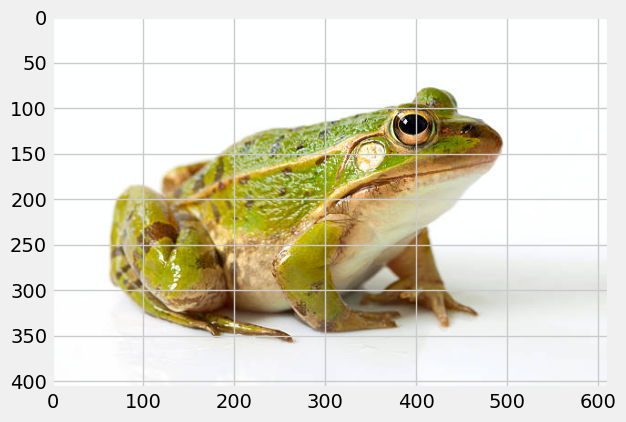

In [ ]:
img=plt.imshow(cat)

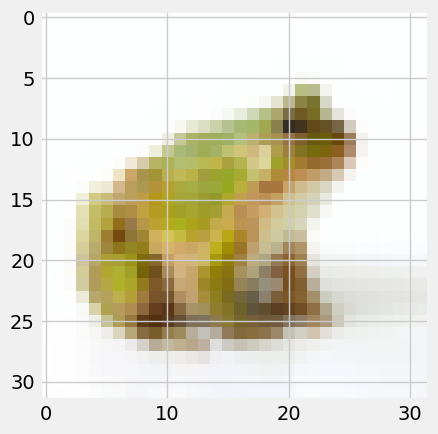

In [ ]:
 #resize the image
 #pip install scikit-image
from skimage import transform
resize=transform.resize(cat,(32,32,3))
img=plt.imshow(resize)

In [ ]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[1.3554899e-07 5.0028639e-06 2.6525426e-04 5.0377599e-03 2.0581851e-05
  4.3885343e-04 9.9422944e-01 4.4870512e-07 1.4868810e-07 2.3421824e-06]]


In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[6, 3, 5, 2, 4, 1, 9, 7, 8, 0]


In [ ]:
for i in range(5):
  print(classification[list_index[i]])

frog
cat
dog
bird
deer
